In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("adult_data.csv")
to_encode = list(df.select_dtypes(include='object').columns)
df[to_encode].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex_selfID         2
native-country    42
income_binary      2
dtype: int64

In [3]:
df.drop(['native-country', 'workclass', 'education', 'capital-loss', 'fnlwgt'], axis=1, inplace=True)
df = pd.get_dummies(df, columns = ['marital-status', 'occupation', 'race', 'sex_selfID', 'relationship', 'income_binary'], drop_first=True)
missing_values = df.isna().sum()
missing_values

age                                      0
education-num                            0
capital-gain                             0
hours-per-week                           0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
occupation_ Adm-clerical                 0
occupation_ Armed-Forces                 0
occupation_ Craft-repair                 0
occupation_ Exec-managerial              0
occupation_ Farming-fishing              0
occupation_ Handlers-cleaners            0
occupation_ Machine-op-inspct            0
occupation_ Other-service                0
occupation_ Priv-house-serv              0
occupation_ Prof-specialty               0
occupation_ Protective-serv              0
occupation_ Sales                        0
occupation_ Tech-support                 0
occupation_

In [4]:
y = df['income_binary_ >50K']
X = df.drop('income_binary_ >50K', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 1234)

0.7645613675913604
0.8265943289998976
0.8425632101545706
0.8410277408127751
0.8274132459821886
0.8027433718906746


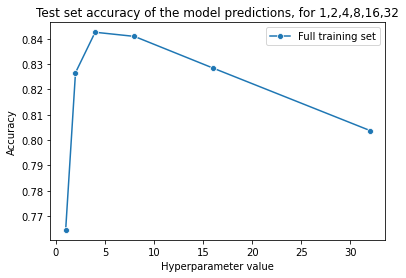

In [5]:
# Decision Tree Model
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    model = DecisionTreeClassifier(min_samples_leaf=leaf, max_depth=depth, criterion=crit)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

def visualize_accuracy(hyperparam_range, acc):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    p = sns.lineplot(x=hyperparam_range, y=acc, marker='o', label = 'Full training set')
        
    plt.title('Test set accuracy of the model predictions, for ' + ','.join([str(h) for h in hyperparam_range]))
    ax.set_xlabel('Hyperparameter value')
    ax.set_ylabel('Accuracy')
    plt.show()
  
def train_multiple_trees(max_depth_range, leaf):
    
    accuracy_list = []
    for val in max_depth_range:
        print(train_test_DT(X_train, X_test, y_train, y_test, leaf, val))
        accuracy_list.append(train_test_DT(X_train, X_test, y_train, y_test, leaf, val))
    return accuracy_list

max_depth_range = [2**i for i in range(6)]
leaf = 1
acc = train_multiple_trees(max_depth_range, leaf)
visualize_accuracy(max_depth_range, acc)

0.7993653393387246
0.8329409356126523
0.8320196540075749
0.8379568021291841
0.8332480294810114
0.8339645818405159
0.8385709898659024
0.8370355205241069
0.8345787695772341
0.8378544375063978


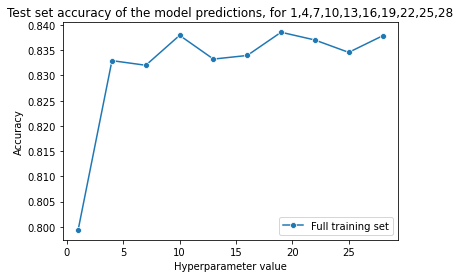

In [6]:
# KNN Classifier

def train_test_knn(X_train, X_test, y_train, y_test, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return acc_score

def train_multiple_knns(k_range):
    accuracy_list = []
    for val in k_range:
        score = train_test_knn(X_train, X_test, y_train, y_test, val)
        accuracy_list.append(score)
        print(score)
    return accuracy_list

k_range = np.arange(1, 30, step = 3) 
list = train_multiple_knns(k_range)
visualize_accuracy(k_range,list)

In [7]:
# Logistic Regression Model
LRModel = LogisticRegression()
LRModel.fit(X_train, y_train)
score = LRModel.score(X_test, y_test)
score

c:\Users\Carrie Lei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8331456648582249

In [8]:
# Random Forest Classifier
RFModel = RandomForestClassifier(random_state=42, n_estimators=50)
RFModel.fit(X_train, y_train)
score = RFModel.score(X_test, y_test)
score

0.8247517657897431

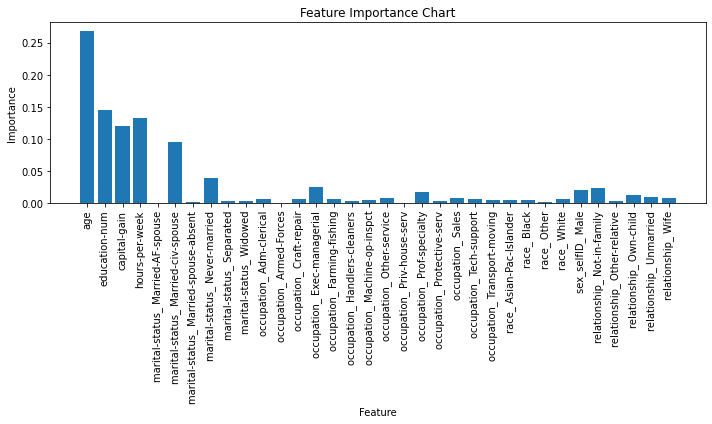

In [9]:
feature_importance = RFModel.feature_importances_

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label = X.columns.tolist())
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Chart')
plt.tight_layout()
plt.show()